In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle
# from statsmodels.graphics.gofplots import qqplot

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.dates as mdates
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from skopt import gp_minimize
from skopt.space import Real, Categorical, Integer
from lightgbm import LGBMRegressor
import nbformat
from bayes_opt import BayesianOptimization
import xgboost as xgb
from statsmodels.graphics.gofplots import qqplot_2samples
import random

C:\Users\balag\AppData\Local\Temp\ipykernel_6388\2598249271.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Set random seed
np.random.seed(101)
random.seed(101)

In [3]:
data = pd.read_csv(r'D:\UTD\UTDFall2023\Calibration-of-LoRaNodes-using-Super-Learners\data\calibrate.csv')
data

,dateTime,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,alveolic_grimm,NH3_loRa,CO_loRa,NO2_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
0,04/08/2019 03:22:30 +0000,8.06,7.48,6.06,8.06,8.06,7.74,0.02,0,4.92,...,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000,28.303333,43.425000,987.790000
1,04/08/2019 03:23:00 +0000,7.84,7.04,6.06,7.84,7.82,7.32,0.02,0,4.90,...,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667,28.286667,43.316667,987.850000
2,04/08/2019 03:23:30 +0000,8.98,7.58,6.08,8.98,8.96,8.22,0.02,0,4.90,...,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667,28.250000,43.301667,987.810000
3,04/08/2019 03:24:00 +0000,8.90,7.60,5.96,8.90,8.74,7.80,0.02,0,4.90,...,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333,28.215000,43.483333,987.810000
4,04/08/2019 03:24:30 +0000,9.72,7.72,6.14,9.72,9.66,8.40,0.02,0,4.90,...,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667,28.205000,43.381667,987.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,04/10/2019 10:52:30 +0000,8.64,5.62,4.94,8.72,8.18,6.08,0.14,0,4.71,...,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000,29.251667,30.115000,980.160000
2059,04/10/2019 10:53:00 +0000,9.72,5.98,5.20,33.96,11.90,6.86,0.14,0,4.73,...,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333,29.228333,30.173333,980.280000
2060,04/10/2019 10:54:00 +0000,11.14,6.82,5.10,30.24,13.58,7.72,0.14,0,4.76,...,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667,29.238333,30.260000,980.038333
2061,04/10/2019 10:54:30 +0000,10.02,6.66,5.12,33.36,14.00,7.46,0.14,0,4.73,...,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000,29.180000,30.353333,980.218333


In [4]:
data.columns

Index(['dateTime', 'pm10_grimm', 'pm2_5_grimm', 'pm1_grimm', 'inhalable_grimm',
       'thoracic_grimm', 'alveolic_grimm', 'NH3_loRa', 'CO_loRa', 'NO2_loRa',
       'C3H8_loRa', 'C4H10_loRa', 'CH4_loRa', 'H2_loRa', 'C2H5OH_loRa',
       'P1_lpo_loRa', 'P1_ratio_loRa', 'P1_conc_loRa', 'P2_lpo_loRa',
       'P2_ratio_loRa', 'P2_conc_loRa', 'Temperature_loRa', 'Pressure_loRa',
       'Humidity_loRa', 'pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas',
       'pmTotalPalas', 'dCnPalas', 'temperaturePalas', 'humidityPalas',
       'pressurehPalas'],
      dtype='object')

In [5]:
df= pd.concat([data.iloc[:,6], data.iloc[:,0:6],data.iloc[:,15:data.shape[1]]],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alveolic_grimm    2063 non-null   float64
 1   dateTime          2063 non-null   object 
 2   pm10_grimm        2063 non-null   float64
 3   pm2_5_grimm       2063 non-null   float64
 4   pm1_grimm         2063 non-null   float64
 5   inhalable_grimm   2063 non-null   float64
 6   thoracic_grimm    2063 non-null   float64
 7   P1_lpo_loRa       2063 non-null   int64  
 8   P1_ratio_loRa     2063 non-null   float64
 9   P1_conc_loRa      2063 non-null   float64
 10  P2_lpo_loRa       2063 non-null   int64  
 11  P2_ratio_loRa     2063 non-null   float64
 12  P2_conc_loRa      2063 non-null   float64
 13  Temperature_loRa  2063 non-null   float64
 14  Pressure_loRa     2063 non-null   int64  
 15  Humidity_loRa     2063 non-null   int64  
 16  pm1Palas          2063 non-null   float64


In [6]:
def data_checker(df):
    # data_frame = df.iloc[:,1:16]
    data_frame =  df.iloc[:,7:-3] 
    # Palas limits are 0-100 mg/m3
    #BME limits are :Temp -40C to 85C
                   #:Pressure 300hPa to 1100 hPa or  300*100Pa to 1100*100 Pa
                   #:Humidity 0% to 100%
     #PPD42NS :Operating Temp is 0C to 45C
    idx = data_frame[(data_frame['Temperature_loRa']>=0) & (data_frame['Temperature_loRa']<=45) &
                    (data_frame['Pressure_loRa']>=300*100) & (data_frame['Pressure_loRa']<=1100*100) &
                    (data_frame['Humidity_loRa']>=0) & (data_frame['Humidity_loRa']<=100) &
                    (data_frame['pm1Palas']>=0) & (data_frame['pm2_5Palas']>=0) &
                    (data_frame['pm4Palas']>=0) & (data_frame['pm10Palas']>=0) &
                    (data_frame['pmTotalPalas']>=0) & (data_frame['dCnPalas']>=0)&
                    (data_frame['pm1Palas']<=100000) & (data_frame['pm2_5Palas']<=100000) &
                    (data_frame['pm4Palas']<=100000) & (data_frame['pm10Palas']<=100000) &
                    (data_frame['pmTotalPalas']<=100000) & (data_frame['dCnPalas']<=100000)].index
                    # &
                    # (data_frame['P1_conc_loRa'] + data_frame['P2_conc_loRa']>=0) &
                    # (data_frame['P1_conc_loRa'] + data_frame['P2_conc_loRa']<=28000)].index
    return df.loc[idx]
df = data_checker(df)
df

,alveolic_grimm,dateTime,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
0,7.74,04/08/2019 03:22:30 +0000,8.06,7.48,6.06,8.06,8.06,2556,0.02,9.48,...,67,7.500000,9.210000,11.390000,13.516667,15.256667,191.830000,28.303333,43.425000,987.790000
1,7.32,04/08/2019 03:23:00 +0000,7.84,7.04,6.06,7.84,7.82,0,0.00,0.62,...,68,7.493333,9.210000,11.386667,13.506667,15.246667,191.786667,28.286667,43.316667,987.850000
2,8.22,04/08/2019 03:23:30 +0000,8.98,7.58,6.08,8.98,8.96,86608,0.58,299.81,...,68,7.490000,9.206667,11.380000,13.493333,15.226667,191.736667,28.250000,43.301667,987.810000
3,7.80,04/08/2019 03:24:00 +0000,8.90,7.60,5.96,8.90,8.74,0,0.00,0.62,...,68,7.490000,9.200000,11.370000,13.480000,15.206667,191.703333,28.215000,43.483333,987.810000
4,8.40,04/08/2019 03:24:30 +0000,9.72,7.72,6.14,9.72,9.66,153937,1.03,531.46,...,68,7.490000,9.200000,11.360000,13.466667,15.193333,191.676667,28.205000,43.381667,987.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,6.08,04/10/2019 10:52:30 +0000,8.64,5.62,4.94,8.72,8.18,73639,0.49,255.12,...,52,5.913333,6.883333,7.923333,12.833333,20.376667,204.200000,29.251667,30.115000,980.160000
2059,6.86,04/10/2019 10:53:00 +0000,9.72,5.98,5.20,33.96,11.90,0,0.00,0.62,...,52,5.923333,6.853333,7.813333,12.610000,20.093333,205.363333,29.228333,30.173333,980.280000
2060,7.72,04/10/2019 10:54:00 +0000,11.14,6.82,5.10,30.24,13.58,0,0.00,0.62,...,52,5.986667,6.866667,7.680000,12.440000,19.880000,208.336667,29.238333,30.260000,980.038333
2061,7.46,04/10/2019 10:54:30 +0000,10.02,6.66,5.12,33.36,14.00,0,0.00,0.62,...,52,6.023333,6.903333,7.716667,12.476667,19.916667,209.700000,29.180000,30.353333,980.218333


In [7]:
df.describe()

,alveolic_grimm,pm10_grimm,pm2_5_grimm,pm1_grimm,inhalable_grimm,thoracic_grimm,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,P2_lpo_loRa,...,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas,temperaturePalas,humidityPalas,pressurehPalas
count,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2.063000e+03,...,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,7.626583,10.021008,6.923800,5.866670,18.277838,10.487571,26775.528357,0.178507,93.041299,1.317343e+05,...,46.711100,6.525406,7.786447,9.242287,14.728641,24.882920,209.331043,32.621074,26.367609,982.382139
std,2.123536,2.755813,2.063206,1.780787,15.991072,2.924185,63234.738633,0.421589,218.421909,1.904410e+05,...,18.411397,1.910236,2.170070,2.583149,3.898749,10.253577,58.102719,3.740014,10.466718,15.092447
min,3.080000,3.260000,2.920000,2.440000,3.260000,3.260000,0.000000,0.000000,0.620000,0.000000e+00,...,20.000000,1.536667,2.226667,1.603333,4.316667,4.463333,54.993333,26.543333,6.611667,700.000000
25%,6.040000,7.980000,5.300000,4.200000,9.420000,8.390000,0.000000,0.000000,0.620000,0.000000e+00,...,35.000000,4.440000,5.723333,7.195000,12.606667,16.770000,154.331667,29.672500,19.890000,981.640000
50%,7.260000,9.920000,6.560000,5.600000,12.320000,10.400000,0.000000,0.000000,0.620000,7.565400e+04,...,42.000000,6.783333,7.960000,9.370000,14.343333,22.623333,208.360000,32.566667,23.921667,983.498333
75%,9.480000,11.920000,8.570000,7.360000,21.220000,12.300000,0.000000,0.000000,0.620000,1.876995e+05,...,48.000000,8.123333,9.590000,11.553333,16.238333,30.716667,241.365000,35.459167,27.833333,987.890000
max,15.040000,24.300000,14.220000,13.240000,192.560000,23.260000,723931.000000,4.830000,2545.390000,2.863259e+06,...,85.000000,17.293333,19.593333,20.923333,37.983333,119.296667,396.230000,41.660000,47.730000,989.130000


In [8]:
dict_col_names = {'pm1Palas':'PM$_{1.0}$ in $\mu g/m^3 $ (Palas)', 
                  'pm2_5Palas': 'PM$_{2.5}$ in $\mu g/m^3$ (Palas)',
                  'pm4Palas': 'PM$_{4.0}$ in $\mu g/m^3$ (Palas)',
                  'pm10Palas': 'PM$_{10.0}$ in $\mu g/m^3$ (Palas)',
                  'pmTotalPalas': 'Total PM Concentration in $\mu g/m^3$ (Palas)', 
                  'dCnPalas': 'Particle Count Density in #/cm$^{3}$ (Palas)', 
                  'P1_lpo_loRa': '> 1 μm LPO (LoRa)',
                  'P1_ratio_loRa': '> 1 μm Ratio (LoRa)',
                  'P1_conc_loRa':'> 1 μm Concentration in $\mu g/m^3$ (LoRa)' , 
                  'P2_lpo_loRa': '> 2.5 μm LPO (LoRa)',
                  'P2_ratio_loRa': '> 2.5 μm Ratio (LoRa)', 
                  'P2_conc_loRa': '> 2.5 μm Concentration in $\mu g/m^3$ (LoRa)',
                  'Temperature_loRa': 'Temperature in ℃ (LoRa)', 
                  'Pressure_loRa': 'Pressure in Pa (LoRa)',
                  'Humidity_loRa': 'Humidity in % (LoRa)'} 

In [8]:
# def hist_plots(df):
#     for col in df.columns[1:len(df.columns)]:
#         sns.histplot(df[col], kde = True, color = 'blue', bins = 30)
#         plt.title(f'{dict_col_names[col]} Histogram with KDE')
#         plt.xlabel(col)
#         plt.ylabel('Count')
#         plt.show()
# hist_plots(df)
# def box_plots(df):
#     for col in df.columns[1:len(df.columns)]:
#         plt.boxplot(df[col])
#         plt.title(f'{dict_col_names[col]} BoxPlot')
#         plt.xlabel(col)
#         plt.ylabel('Count')
#         plt.show()
# box_plots(df)

In [9]:
filtered_data = df.iloc[:,7:-3]
filtered_data. describe()

,P1_lpo_loRa,P1_ratio_loRa,P1_conc_loRa,P2_lpo_loRa,P2_ratio_loRa,P2_conc_loRa,Temperature_loRa,Pressure_loRa,Humidity_loRa,pm1Palas,pm2_5Palas,pm4Palas,pm10Palas,pmTotalPalas,dCnPalas
count,2063.000000,2063.000000,2063.000000,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,26775.528357,0.178507,93.041299,1.317343e+05,0.878265,463.171178,23.730664,98555.224430,46.711100,6.525406,7.786447,9.242287,14.728641,24.882920,209.331043
std,63234.738633,0.421589,218.421909,1.904410e+05,1.269606,750.597435,4.136197,295.473469,18.411397,1.910236,2.170070,2.583149,3.898749,10.253577,58.102719
min,0.000000,0.000000,0.620000,0.000000e+00,0.000000,0.620000,17.120000,98117.000000,20.000000,1.536667,2.226667,1.603333,4.316667,4.463333,54.993333
25%,0.000000,0.000000,0.620000,0.000000e+00,0.000000,0.620000,21.000000,98302.500000,35.000000,4.440000,5.723333,7.195000,12.606667,16.770000,154.331667
50%,0.000000,0.000000,0.620000,7.565400e+04,0.500000,262.060000,23.540000,98440.000000,42.000000,6.783333,7.960000,9.370000,14.343333,22.623333,208.360000
75%,0.000000,0.000000,0.620000,1.876995e+05,1.250000,647.520000,26.460000,98870.500000,48.000000,8.123333,9.590000,11.553333,16.238333,30.716667,241.365000
max,723931.000000,4.830000,2545.390000,2.863259e+06,19.090000,16192.690000,33.780000,98960.000000,85.000000,17.293333,19.593333,20.923333,37.983333,119.296667,396.230000


In [10]:
col_name = list(filtered_data)
x =[]
y_Palas  = []
for i in col_name:
    if "_loRa" in i:
        x.append(i)
    if "Palas" in i:
        y_Palas.append(i)
Palas = {}
for i in y_Palas:
    Palas_cols = x + [i]
    Palas[i[:-len("Palas")]] = filtered_data[Palas_cols]
y_Palas

['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

In [11]:
def plot_residuals(predict_test,y_test,filtered_data):
    idx = X_test.index
    data_test = filtered_data.loc[idx]
    data_test["dateTime"] = pd.to_datetime(data_test["dateTime"])
    residuals = (np.array(y_test) - predict_test)**2
    plt.figure()
    plt.scatter(data_test["dateTime"], residuals)
    plt.xticks(rotation = 45)
    plt.xlabel('Date Time')
    plt.ylabel(y_test.name)
    plt.show()

In [12]:
dict_col_regression = {'pm1Palas':'PM$_{1.0}$', 
                       'pm2_5Palas': 'PM$_{2.5}$',
                       'pm4Palas': 'PM$_{4.0}$',
                       'pm10Palas': 'PM$_{10.0}$',
                       'pmTotalPalas': 'Total PM Concentration', 
                       'dCnPalas': 'Particle Count Density',
                       'dateTime': 'Date Time',
                       'P1_lpo_loRa':'> 1 μm LPO',
                       'P1_ratio_loRa': '> 1 μm ratio', 
                       'P1_conc_loRa': '> 1 μm Concentration', 
                       'P2_lpo_loRa': '> 2.5 μm LPO', 
                       'P2_ratio_loRa': '> 2.5 μm ratio',
                       'P2_conc_loRa': '> 2.5 μm Concentration' , 
                       'Temperature_loRa': 'Temperature', 
                       'Pressure_loRa': 'Pressure', 
                       'Humidity_loRa':'Humidity'}
unit_regression = {'pm_conc':'($\mu g/m^3$)',
                   'dCn':'(#/cm$^{3}$)'} 

In [13]:
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Linear_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Decision_Tree_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ensemble_Bagging_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ridge_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/KNN_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/XGBoost_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression.ipynb
%run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression.ipynb

## R^2 Score Without Hyperparmaeter tuning

In [14]:

r2_score_train_lr ={}
r2_score_train_rr = {}
r2_score_train_knn = {}
r2_score_train_dt ={}
r2_score_train_xgb = {}
r2_score_train_lgbm ={}
r2_score_train_br ={}
r2_score_train_nn ={}
r2_score_train_rf ={}

r2_score_test_lr ={}
r2_score_test_rr = {}
r2_score_test_knn = {}
r2_score_test_dt ={}
r2_score_test_xgb = {}
r2_score_test_lgbm ={}
r2_score_test_br ={}
r2_score_test_nn ={}
r2_score_test_rf ={}


# r2_score_test_sl = {}

for k,v in enumerate(Palas):
    X = Palas[v].drop([v+"Palas"],axis = 1)
    y = Palas[v][v+"Palas"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 20)
    X_train.to_csv("X_train.csv")
    X_test.to_csv("X_test.csv")
    y_train.to_csv("y_train.csv")
    y_test.to_csv("y_test.csv")

    r2_score_test_lr[v],r2_score_train_lr[v] =  Linear_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_rr[v],r2_score_train_rr[v] = Ridge_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_knn[v],r2_score_train_knn[v] = KNN_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_dt[v],r2_score_train_dt[v] = Decision_Tree_Regression(X_train,X_test,y_train,y_test,filtered_data)   
    r2_score_test_xgb[v],r2_score_train_xgb[v] = XGBoost_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_lgbm[v],r2_score_train_lgbm[v]  =  LGBM_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_br[v],r2_score_train_br[v] = Ensemble_Bagging_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_nn[v],r2_score_train_nn[v] = Neural_Network_Regression(X_train,X_test,y_train,y_test,filtered_data)
    r2_score_test_rf[v],r2_score_train_rf[v] = Random_Forest_Regression(X_train,X_test,y_train,y_test,filtered_data)
    
   

R2 value of train data 0.48
R2 value of test data 0.46
r2 train 0.48
r2 test 0.46
r2 train 0.97
r2 test 0.86
R2 value of train data 1.0
R2 value of test data 0.97
R2 value of train data: 1.0
R2 value of test data: 0.97
r2 train 1.0
r2 test 0.96


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


r2 train 0.95
r2 test 0.88
R2 value of train data 1.0
R2 value of test data 0.97
R2 value of train data 0.51
R2 value of test data 0.5
r2 train 0.51
r2 test 0.5
r2 train 0.96
r2 test 0.86
R2 value of train data 1.0
R2 value of test data 0.98
R2 value of train data: 1.0
R2 value of test data: 0.98
r2 train 1.0
r2 test 0.97


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


r2 train 0.94
r2 test 0.88
R2 value of train data 1.0
R2 value of test data 0.98
R2 value of train data 0.56
R2 value of test data 0.55
r2 train 0.56
r2 test 0.55
r2 train 0.96
r2 test 0.87
R2 value of train data 1.0
R2 value of test data 0.96
R2 value of train data: 1.0
R2 value of test data: 0.96
r2 train 1.0
r2 test 0.97
r2 train 0.93
r2 test 0.88
R2 value of train data 1.0
R2 value of test data 0.97
R2 value of train data 0.16
R2 value of test data 0.17
r2 train 0.15
r2 test 0.17
r2 train 0.82
r2 test 0.59
R2 value of train data 1.0
R2 value of test data 0.81
R2 value of train data: 0.99
R2 value of test data: 0.87
r2 train 0.98
r2 test 0.9


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


r2 train 0.63
r2 test 0.59
R2 value of train data 0.99
R2 value of test data 0.89
R2 value of train data 0.21
R2 value of test data 0.21
r2 train 0.21
r2 test 0.21
r2 train 0.73
r2 test 0.46
R2 value of train data 1.0
R2 value of test data 0.67
R2 value of train data: 0.99
R2 value of test data: 0.71
r2 train 0.96
r2 test 0.8


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


r2 train 0.45
r2 test 0.4
R2 value of train data 0.97
R2 value of test data 0.8
R2 value of train data 0.4
R2 value of test data 0.38
r2 train 0.4
r2 test 0.38
r2 train 0.96
r2 test 0.9
R2 value of train data 1.0
R2 value of test data 0.99
R2 value of train data: 1.0
R2 value of test data: 0.99
r2 train 1.0
r2 test 0.99


C:\Users\balag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


r2 train 0.95
r2 test 0.92
R2 value of train data 1.0
R2 value of test data 0.99


## Training R^2 Score Without Hyperparmaeter Tuning for all Models (Pre Super Learner)

In [15]:
import pandas as pd

models = [
    "Linear_Regression",
    "Random_Forest_Regression",
    "XGBoost_Regression",
    "Decision_Tree_Regression",
    "LGBM_Regression",
    "Ensemble_Bagging_Regression",
    "Neural_Network_Regression",
    "Ridge_Regression",
    "KNN_Regression"
]

v_values = ["pm1", "pm2_5", "pm4", "pm10", "pmTotal", "dCn"]

# Initialize a DataFrame to store the R^2 scores
data = {
    "Model": models
}

# Populate the R^2 scores
for v in v_values:
    data[v] = [
        r2_score_train_lr[v],
        r2_score_train_rf[v],
        r2_score_train_xgb[v],
        r2_score_train_dt[v],
        r2_score_train_lgbm[v],
        r2_score_train_br[v],
        r2_score_train_nn[v],
        r2_score_train_rr[v],
        r2_score_train_knn[v]
    ]

# Create the DataFrame
r2_score_table = pd.DataFrame(data)

# Calculate the overall R^2 average for each model
r2_score_table["R2_Average"] = r2_score_table[v_values].mean(axis=1)

# Sort the table by the overall R^2 average in descending order
r2_score_table = r2_score_table.sort_values(by="R2_Average", ascending=False)

# Save the sorted table to a CSV file
r2_score_table.to_csv("sorted_r2_score_table.csv", index=False)

# Display the sorted table
print(r2_score_table)


                         Model   pm1  pm2_5   pm4  pm10  pmTotal   dCn  \
3     Decision_Tree_Regression  1.00   1.00  1.00  1.00     1.00  1.00   
2           XGBoost_Regression  1.00   1.00  1.00  0.99     0.99  1.00   
1     Random_Forest_Regression  1.00   1.00  1.00  0.99     0.97  1.00   
5  Ensemble_Bagging_Regression  1.00   1.00  1.00  0.98     0.96  1.00   
4              LGBM_Regression  1.00   1.00  0.99  0.96     0.92  1.00   
8               KNN_Regression  0.97   0.96  0.96  0.82     0.73  0.96   
6    Neural_Network_Regression  0.95   0.94  0.93  0.63     0.45  0.95   
0            Linear_Regression  0.48   0.51  0.56  0.16     0.21  0.40   
7             Ridge_Regression  0.48   0.51  0.56  0.15     0.21  0.40   

   R2_Average  
3    1.000000  
2    0.996667  
1    0.993333  
5    0.990000  
4    0.978333  
8    0.900000  
6    0.808333  
0    0.386667  
7    0.385000  


## Testing R^2 Score Without Hyperparmaeter Tuning for all Models (Pre Super Learner)

In [16]:
import pandas as pd

models = [
    "Linear_Regression",
    "Random_Forest_Regression",
    "XGBoost_Regression",
    "Decision_Tree_Regression",
    "LGBM_Regression",
    "Ensemble_Bagging_Regression",
    "Neural_Network_Regression",
    "Ridge_Regression",
    "KNN_Regression"
]

v_values = ["pm1", "pm2_5", "pm4", "pm10", "pmTotal", "dCn"]

# Initialize a DataFrame to store the R^2 scores
data = {
    "Model": models
}

for v in v_values:
    data[v] = [
        r2_score_test_lr[v],
        r2_score_test_rf[v],
        r2_score_test_xgb[v],
        r2_score_test_dt[v],
        r2_score_test_lgbm[v],
        r2_score_test_br[v],
        r2_score_test_nn[v],
        r2_score_test_rr[v],
        r2_score_test_knn[v]
    ]

# Create the DataFrame
r2_score_table = pd.DataFrame(data)

# Sort the table by decreasing order of R^2 scores for each column in v_values
for v in v_values:
    r2_score_table = r2_score_table.sort_values(by=v, ascending=False)

# Save the sorted table to a CSV file
r2_score_table.to_csv("sorted_r2_score_table.csv", index=False)

# Display the sorted table
print(r2_score_table)


                         Model   pm1  pm2_5   pm4  pm10  pmTotal   dCn
5  Ensemble_Bagging_Regression  0.96   0.97  0.97  0.90     0.80  0.99
1     Random_Forest_Regression  0.97   0.98  0.97  0.89     0.80  0.99
2           XGBoost_Regression  0.97   0.98  0.96  0.87     0.71  0.99
3     Decision_Tree_Regression  0.97   0.98  0.96  0.81     0.67  0.99
4              LGBM_Regression  0.95   0.95  0.96  0.90     0.80  0.98
6    Neural_Network_Regression  0.88   0.88  0.88  0.59     0.40  0.92
8               KNN_Regression  0.86   0.86  0.87  0.59     0.46  0.90
0            Linear_Regression  0.46   0.50  0.55  0.17     0.21  0.38
7             Ridge_Regression  0.46   0.50  0.55  0.17     0.21  0.38


In [18]:
import pandas as pd

models = [
    "Linear_Regression",
    "Random_Forest_Regression",
    "XGBoost_Regression",
    "Decision_Tree_Regression",
    "LGBM_Regression",
    "Ensemble_Bagging_Regression",
    "Neural_Network_Regression",
    "Ridge_Regression",
    "KNN_Regression"
]

v_values = ["pm1", "pm2_5", "pm4", "pm10", "pmTotal", "dCn"]

# Initialize a DataFrame to store the R^2 scores
data = {
    "Model": models
}

for v in v_values:
    data[v] = [
        r2_score_test_lr[v],
        r2_score_test_rf[v],
        r2_score_test_xgb[v],
        r2_score_test_dt[v],
        r2_score_test_lgbm[v],
        r2_score_test_br[v],
        r2_score_test_nn[v],
        r2_score_test_rr[v],
        r2_score_test_knn[v]
    ]

# Create the DataFrame
r2_score_table = pd.DataFrame(data)

# Calculate the overall R^2 average for each model
r2_score_table["R2_Average"] = r2_score_table[v_values].mean(axis=1)

# Sort the table by the overall R^2 average in descending order
r2_score_table = r2_score_table.sort_values(by="R2_Average", ascending=False)

# Save the sorted table to a CSV file
r2_score_table.to_csv("sorted_r2_score_table.csv", index=False)

# Display the sorted table
print(r2_score_table)


                         Model   pm1  pm2_5   pm4  pm10  pmTotal   dCn  \
1     Random_Forest_Regression  0.97   0.98  0.97  0.89     0.80  0.99   
5  Ensemble_Bagging_Regression  0.96   0.97  0.97  0.90     0.80  0.99   
4              LGBM_Regression  0.95   0.95  0.96  0.90     0.80  0.98   
2           XGBoost_Regression  0.97   0.98  0.96  0.87     0.71  0.99   
3     Decision_Tree_Regression  0.97   0.98  0.96  0.81     0.67  0.99   
6    Neural_Network_Regression  0.88   0.88  0.88  0.59     0.40  0.92   
8               KNN_Regression  0.86   0.86  0.87  0.59     0.46  0.90   
0            Linear_Regression  0.46   0.50  0.55  0.17     0.21  0.38   
7             Ridge_Regression  0.46   0.50  0.55  0.17     0.21  0.38   

   R2_Average  
1    0.933333  
5    0.931667  
4    0.923333  
2    0.913333  
3    0.896667  
6    0.758333  
8    0.756667  
0    0.378333  
7    0.378333  


## Training Super Learner without Hyperparameter tuning

In [129]:
# r2_score_test_sl = {}

# def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
#     ml_type = 'SL'
#     estimators = [
#         ('rf', RandomForestRegressor(n_estimators = 50, random_state = 0)),
#         ('br', BaggingRegressor(estimator = RandomForestRegressor(), n_estimators=10, random_state=42)),
#         ('lgbm',LGBMRegressor(
#         n_estimators=100,
#         max_depth=-1,
#         learning_rate=0.1,
#         num_leaves=31,
#         min_child_samples=20,
#         random_state=1
#         )),
#         ('dt', DecisionTreeRegressor(random_state = 0))
#     ]
    
#     model = StackingRegressor(
#         estimators = estimators,
#         final_estimator = LinearRegression())

#     model.fit(X_train, y_train)
    
#     predict_train = model.predict(X_train)
#     predict_test = model.predict(X_test)
    
#     train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
#     test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
#     # Concatenate the DataFrames
#     combined_df = pd.concat([train_df, test_df])
#     combined_df = combined_df.sort_index()
#     # Print or use the combined DataFrame as needed
#     # print(combined_df)
    
#     r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
#     r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
#     print('r2 train',r2_score_train)    
#     print('r2 test',r2_score_test) 
    
#     if (v == 'dCn'):
#         unit = 'dCn'
#     else:
#         unit = 'pm_conc'
    
#     # Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
#     # qq_plot(test_df, v, unit,ml_type)
#     return r2_score_test

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)
#     X_train.to_csv("X_train.csv")
#     X_test.to_csv("X_test.csv")
#     y_train.to_csv("y_train.csv")
#     y_test.to_csv("y_test.csv")
#     r2_score_test_sl[v] = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
# r2_score_test_sl

In [130]:
# models = [
#     "Stacking_Learner",
#     "Random_Forest_Regression",
#     "Decision_Tree_Regression",
#     "Ensemble_Bagging_Regression",
#     "LGBM_Regression",
#     "XGBoost_Regression",
#     "Neural_Network_Regression",
#     "KNN_Regression",
#     "Linear_Regression",
#     "Ridge_Regression"
# ]

# v_values = ["pm1", "pm2_5", "pm4", "pm10", "pmTotal", "dCn"]

# # Initialize a DataFrame to store the R^2 scores
# data = {
#     "Model": models,
#     "pm1": [0.99, 0.99, 0.98, 0.99, 0.99, 0.97, 0.96, 0.96, 0.48, 0.48],
#     "pm2_5": [0.99, 0.97, 0.98, 0.96, 0.96, 0.97, 0.90, 0.85, 0.46, 0.45],
#     "pm4": [0.99, 0.99, 0.98, 0.99, 0.99, 0.98, 0.93, 0.93, 0.60, 0.61],
#     "pm10": [0.91, 0.91, 0.86, 0.91, 0.90, 0.89, 0.66, 0.57, 0.20, 0.19],
#     "pmTotal": [0.86, 0.76, 0.75, 0.72, 0.72, 0.72, 0.44, 0.19, 0.16, 0.16],
#     "dCn": [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.97, 0.94, 0.43, 0.43]
# }

# # Create the DataFrame
# r2_score_table = pd.DataFrame(data)

# # Save the table to a CSV file
# r2_score_table.to_csv("sorted_r2_score_table.csv", index=False)

# # Display the table
# print(r2_score_table)


In [131]:
# # Suppress all warnings
# import warnings
# warnings.filterwarnings("ignore")
# import itertools
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import r2_score
# import pandas as pd

# # Define all learners
# learners = {
#     'lr': LinearRegression(),
#     'rr': Ridge(random_state=42),
#     'knn': KNeighborsRegressor(),
#     'dt': DecisionTreeRegressor(random_state=42),
#     'rf': RandomForestRegressor(random_state=42),
#     'br': BaggingRegressor(random_state=42),
#     'xgb': XGBRegressor(random_state=42),
#     'lgbm': LGBMRegressor(random_state=42),
#     'nn': MLPRegressor(random_state=42,max_iter = 1000)  # Default Neural Network with random_state
# }

# # Function to evaluate a stacking model
# def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
#     estimators = [(name, model) for name, model in base_learners.items()]
#     model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return r2_score(y_test, y_pred)

# # Prepare data for modeling
# results = []

# for v in Palas.keys():
#     print(v)
#     if v == "pmTotal":
#         X = Palas[v].drop([v + "Palas"], axis=1)
#         y = Palas[v][v + "Palas"]
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
#          # Generate all combinations of 4 base learners
#         base_combinations = list(itertools.combinations(learners.keys(), 4))
#         counter = 0
#         for base_comb in base_combinations:
#             counter+=1
#             print("comb:",counter)
#             for meta_learner_name in learners.keys():
#                 base_learners = {name: learners[name] for name in base_comb}
#                 meta_learner = learners[meta_learner_name]
                
#                  # Evaluate the stacking model
#                 r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)
                
#                  # Store the result
#                 results.append({
#                     'Base Learners': ', '.join(base_comb),
#                      'Meta Learner': meta_learner_name,
#                     'R2 Score': r2
#                  })
        
#         # Convert results to a DataFrame and sort by R2 score
#         results_df = pd.DataFrame(results)
#         results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
        
#         # Display the top-performing combinations
#         # import ace_tools as tools; tools.display_dataframe_to_user(name="Stacking Model Performance", dataframe=results_df)
        
# results_df


In [132]:
# results_df_pmTotal = results_df
# results_df_pmTotal

In [173]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define all learners
learners = {
    'lr': LinearRegression(),
    'rr': Ridge(random_state=42),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'br': BaggingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'lgbm': LGBMRegressor(random_state=42),
    'nn': MLPRegressor(random_state=42, max_iter=1000)  # Default Neural Network with random_state
}

# Function to evaluate a stacking model
def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
    estimators = [(name, model) for name, model in base_learners.items()]
    model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
    model.fit(X_train, y_train)
    
    # Predictions for training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_r2, test_r2

# Prepare data for modeling
results = []

for v in Palas.keys():
    print(v)
    if v == "pm1": # ['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
        # Generate all combinations of 4 base learners
        base_combinations = list(itertools.combinations(learners.keys(), 4))
        counter = 0
        for base_comb in base_combinations:
            for meta_learner_name in learners.keys():
                # Ensure meta-learner can also be a base learner
                base_learners = {name: learners[name] for name in base_comb}
                meta_learner = learners[meta_learner_name]

                # Evaluate the stacking model
                counter += 1
                print("comb:", counter)
                train_r2, test_r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)

                # Store the result
                results.append({
                    'Base Learners': ', '.join(base_comb),
                    'Meta Learner': meta_learner_name,
                    'Train R2 Score': train_r2,
                    'Test R2 Score': test_r2,
                    'Overfitting': 'Yes' if (train_r2 - test_r2) > 0.1 else 'No'
                })

# Convert results to a DataFrame and sort by Test R2 score
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
results_df_pm1_fit = results_df

# Filter for cases where Train R2 Score > Test R2 Score
results_df_pm1_fit_overfit = results_df_pm1_fit[results_df_pm1_fit['Train R2 Score'] > results_df_pm1_fit['Test R2 Score']]

results_df_pm1_fit, results_df_pm1_fit_overfit

pm1
comb: 1
comb: 2
comb: 3
comb: 4
comb: 5
comb: 6
comb: 7
comb: 8
comb: 9
comb: 10
comb: 11
comb: 12
comb: 13
comb: 14
comb: 15
comb: 16
comb: 17
comb: 18
comb: 19
comb: 20
comb: 21
comb: 22
comb: 23
comb: 24
comb: 25
comb: 26
comb: 27
comb: 28
comb: 29
comb: 30
comb: 31
comb: 32
comb: 33
comb: 34
comb: 35
comb: 36
comb: 37
comb: 38
comb: 39
comb: 40
comb: 41
comb: 42
comb: 43
comb: 44
comb: 45
comb: 46
comb: 47
comb: 48
comb: 49
comb: 50
comb: 51
comb: 52
comb: 53
comb: 54
comb: 55
comb: 56
comb: 57
comb: 58
comb: 59
comb: 60
comb: 61
comb: 62
comb: 63
comb: 64
comb: 65
comb: 66
comb: 67
comb: 68
comb: 69
comb: 70
comb: 71
comb: 72
comb: 73
comb: 74
comb: 75
comb: 76
comb: 77
comb: 78
comb: 79
comb: 80
comb: 81
comb: 82
comb: 83
comb: 84
comb: 85
comb: 86
comb: 87
comb: 88
comb: 89
comb: 90
comb: 91
comb: 92
comb: 93
comb: 94
comb: 95
comb: 96
comb: 97
comb: 98
comb: 99
comb: 100
comb: 101
comb: 102
comb: 103
comb: 104
comb: 105
comb: 106
comb: 107
comb: 108
comb: 109
comb: 110
comb

(       Base Learners Meta Learner  Train R2 Score  Test R2 Score Overfitting
 139  lr, rr, br, xgb           rf        0.994229       0.995580          No
 364  lr, dt, br, xgb           rf        0.993784       0.995559          No
 110  lr, rr, rf, xgb          knn        0.989767       0.995538          No
 481  lr, br, xgb, nn           rf        0.994826       0.995389          No
 796  rr, br, xgb, nn           rf        0.994239       0.995363          No
 ..               ...          ...             ...            ...         ...
 935  knn, rf, br, nn           nn       -0.000209      -0.229933         Yes
 881  knn, dt, br, nn           nn       -0.002505      -0.238011         Yes
 233  lr, knn, dt, nn           nn       -0.128774      -0.347987         Yes
 548  rr, knn, dt, nn           nn       -0.128445      -0.348454         Yes
 98    lr, rr, dt, nn           nn       -0.137317      -0.351876         Yes
 
 [1134 rows x 5 columns],
          Base Learners Meta Learner

In [134]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define all learners
learners = {
    'lr': LinearRegression(),
    'rr': Ridge(random_state=42),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'br': BaggingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'lgbm': LGBMRegressor(random_state=42),
    'nn': MLPRegressor(random_state=42, max_iter=1000)  # Default Neural Network with random_state
}

# Function to evaluate a stacking model
def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
    estimators = [(name, model) for name, model in base_learners.items()]
    model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
    model.fit(X_train, y_train)
    
    # Predictions for training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_r2, test_r2

# Prepare data for modeling
results = []

for v in Palas.keys():
    print(v)
    if v == "pm2_5": # ['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
        # Generate all combinations of 4 base learners
        base_combinations = list(itertools.combinations(learners.keys(), 4))
        counter = 0
        for base_comb in base_combinations:
            for meta_learner_name in learners.keys():
                # Ensure meta-learner can also be a base learner
                base_learners = {name: learners[name] for name in base_comb}
                meta_learner = learners[meta_learner_name]

                # Evaluate the stacking model
                counter += 1
                print("comb:", counter)
                train_r2, test_r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)

                # Store the result
                results.append({
                    'Base Learners': ', '.join(base_comb),
                    'Meta Learner': meta_learner_name,
                    'Train R2 Score': train_r2,
                    'Test R2 Score': test_r2,
                    'Overfitting': 'Yes' if (train_r2 - test_r2) > 0.1 else 'No'
                })

# Convert results to a DataFrame and sort by Test R2 score
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
results_df_pm2_5_fit = results_df
results_df_pm2_5_fit

pm1
pm2_5
comb: 1
comb: 2
comb: 3
comb: 4
comb: 5
comb: 6
comb: 7
comb: 8
comb: 9
comb: 10
comb: 11
comb: 12
comb: 13
comb: 14
comb: 15
comb: 16
comb: 17
comb: 18
comb: 19
comb: 20
comb: 21
comb: 22
comb: 23
comb: 24
comb: 25
comb: 26
comb: 27
comb: 28
comb: 29
comb: 30
comb: 31
comb: 32
comb: 33
comb: 34
comb: 35
comb: 36
comb: 37
comb: 38
comb: 39
comb: 40
comb: 41
comb: 42
comb: 43
comb: 44
comb: 45
comb: 46
comb: 47
comb: 48
comb: 49
comb: 50
comb: 51
comb: 52
comb: 53
comb: 54
comb: 55
comb: 56
comb: 57
comb: 58
comb: 59
comb: 60
comb: 61
comb: 62
comb: 63
comb: 64
comb: 65
comb: 66
comb: 67
comb: 68
comb: 69
comb: 70
comb: 71
comb: 72
comb: 73
comb: 74
comb: 75
comb: 76
comb: 77
comb: 78
comb: 79
comb: 80
comb: 81
comb: 82
comb: 83
comb: 84
comb: 85
comb: 86
comb: 87
comb: 88
comb: 89
comb: 90
comb: 91
comb: 92
comb: 93
comb: 94
comb: 95
comb: 96
comb: 97
comb: 98
comb: 99
comb: 100
comb: 101
comb: 102
comb: 103
comb: 104
comb: 105
comb: 106
comb: 107
comb: 108
comb: 109
comb: 11

,Base Learners,Meta Learner,Train R2 Score,Test R2 Score,Overfitting
877,"knn, dt, br, nn",rf,0.996211,0.991885,No
645,"rr, dt, rf, br",xgb,0.977396,0.991792,No
202,"lr, knn, dt, br",rf,0.996231,0.991790,No
382,"lr, dt, br, nn",rf,0.995790,0.991663,No
510,"rr, knn, dt, rf",xgb,0.984712,0.991662,No
...,...,...,...,...,...
179,"lr, rr, xgb, nn",nn,0.661974,0.610380,No
47,"lr, rr, knn, nn",knn,0.557185,0.572484,No
46,"lr, rr, knn, nn",rr,0.612429,0.547842,No
45,"lr, rr, knn, nn",lr,0.612440,0.547822,No


In [135]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define all learners
learners = {
    'lr': LinearRegression(),
    'rr': Ridge(random_state=42),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'br': BaggingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'lgbm': LGBMRegressor(random_state=42),
    'nn': MLPRegressor(random_state=42, max_iter=1000)  # Default Neural Network with random_state
}

# Function to evaluate a stacking model
def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
    estimators = [(name, model) for name, model in base_learners.items()]
    model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
    model.fit(X_train, y_train)
    
    # Predictions for training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_r2, test_r2

# Prepare data for modeling
results = []

for v in Palas.keys():
    print(v)
    if v == "pm4": #['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
        # Generate all combinations of 4 base learners
        base_combinations = list(itertools.combinations(learners.keys(), 4))
        counter = 0
        for base_comb in base_combinations:
            for meta_learner_name in learners.keys():
                # Ensure meta-learner can also be a base learner
                base_learners = {name: learners[name] for name in base_comb}
                meta_learner = learners[meta_learner_name]

                # Evaluate the stacking model
                counter += 1
                print("comb:", counter)
                train_r2, test_r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)

                # Store the result
                results.append({
                    'Base Learners': ', '.join(base_comb),
                    'Meta Learner': meta_learner_name,
                    'Train R2 Score': train_r2,
                    'Test R2 Score': test_r2,
                    'Overfitting': 'Yes' if (train_r2 - test_r2) > 0.1 else 'No'
                })

# Convert results to a DataFrame and sort by Test R2 score
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
results_df_pm4_fit = results_df
results_df_pm4_fit

pm1
pm2_5
pm4
comb: 1
comb: 2
comb: 3
comb: 4
comb: 5
comb: 6
comb: 7
comb: 8
comb: 9
comb: 10
comb: 11
comb: 12
comb: 13
comb: 14
comb: 15
comb: 16
comb: 17
comb: 18
comb: 19
comb: 20
comb: 21
comb: 22
comb: 23
comb: 24
comb: 25
comb: 26
comb: 27
comb: 28
comb: 29
comb: 30
comb: 31
comb: 32
comb: 33
comb: 34
comb: 35
comb: 36
comb: 37
comb: 38
comb: 39
comb: 40
comb: 41
comb: 42
comb: 43
comb: 44
comb: 45
comb: 46
comb: 47
comb: 48
comb: 49
comb: 50
comb: 51
comb: 52
comb: 53
comb: 54
comb: 55
comb: 56
comb: 57
comb: 58
comb: 59
comb: 60
comb: 61
comb: 62
comb: 63
comb: 64
comb: 65
comb: 66
comb: 67
comb: 68
comb: 69
comb: 70
comb: 71
comb: 72
comb: 73
comb: 74
comb: 75
comb: 76
comb: 77
comb: 78
comb: 79
comb: 80
comb: 81
comb: 82
comb: 83
comb: 84
comb: 85
comb: 86
comb: 87
comb: 88
comb: 89
comb: 90
comb: 91
comb: 92
comb: 93
comb: 94
comb: 95
comb: 96
comb: 97
comb: 98
comb: 99
comb: 100
comb: 101
comb: 102
comb: 103
comb: 104
comb: 105
comb: 106
comb: 107
comb: 108
comb: 109
comb

,Base Learners,Meta Learner,Train R2 Score,Test R2 Score,Overfitting
1032,"dt, rf, xgb, lgbm",xgb,0.991581,0.988547,No
77,"lr, rr, dt, xgb",br,0.994702,0.988416,No
526,"rr, knn, dt, xgb",rf,0.995494,0.988229,No
211,"lr, knn, dt, xgb",rf,0.995394,0.988221,No
716,"rr, dt, xgb, nn",br,0.995061,0.988196,No
...,...,...,...,...,...
233,"lr, knn, dt, nn",nn,0.384848,0.246916,Yes
638,"rr, knn, lgbm, nn",nn,0.360255,0.222759,Yes
548,"rr, knn, dt, nn",nn,0.359588,0.218154,Yes
188,"lr, rr, lgbm, nn",nn,0.328228,0.184533,Yes


In [136]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define all learners
learners = {
    'lr': LinearRegression(),
    'rr': Ridge(random_state=42),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'br': BaggingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'lgbm': LGBMRegressor(random_state=42),
    'nn': MLPRegressor(random_state=42, max_iter=1000)  # Default Neural Network with random_state
}

# Function to evaluate a stacking model
def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
    estimators = [(name, model) for name, model in base_learners.items()]
    model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
    model.fit(X_train, y_train)
    
    # Predictions for training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_r2, test_r2

# Prepare data for modeling
results = []

for v in Palas.keys():
    print(v)
    if v == "pm10": # ['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
        # Generate all combinations of 4 base learners
        base_combinations = list(itertools.combinations(learners.keys(), 4))
        counter = 0
        for base_comb in base_combinations:
            for meta_learner_name in learners.keys():
                # Ensure meta-learner can also be a base learner
                base_learners = {name: learners[name] for name in base_comb}
                meta_learner = learners[meta_learner_name]

                # Evaluate the stacking model
                counter += 1
                print("comb:", counter)
                train_r2, test_r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)

                # Store the result
                results.append({
                    'Base Learners': ', '.join(base_comb),
                    'Meta Learner': meta_learner_name,
                    'Train R2 Score': train_r2,
                    'Test R2 Score': test_r2,
                    'Overfitting': 'Yes' if (train_r2 - test_r2) > 0.1 else 'No'
                })

# Convert results to a DataFrame and sort by Test R2 score
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
results_df_pm10_fit = results_df
results_df_pm10_fit

pm1
pm2_5
pm4
pm10
comb: 1
comb: 2
comb: 3
comb: 4
comb: 5
comb: 6
comb: 7
comb: 8
comb: 9
comb: 10
comb: 11
comb: 12
comb: 13
comb: 14
comb: 15
comb: 16
comb: 17
comb: 18
comb: 19
comb: 20
comb: 21
comb: 22
comb: 23
comb: 24
comb: 25
comb: 26
comb: 27
comb: 28
comb: 29
comb: 30
comb: 31
comb: 32
comb: 33
comb: 34
comb: 35
comb: 36
comb: 37
comb: 38
comb: 39
comb: 40
comb: 41
comb: 42
comb: 43
comb: 44
comb: 45
comb: 46
comb: 47
comb: 48
comb: 49
comb: 50
comb: 51
comb: 52
comb: 53
comb: 54
comb: 55
comb: 56
comb: 57
comb: 58
comb: 59
comb: 60
comb: 61
comb: 62
comb: 63
comb: 64
comb: 65
comb: 66
comb: 67
comb: 68
comb: 69
comb: 70
comb: 71
comb: 72
comb: 73
comb: 74
comb: 75
comb: 76
comb: 77
comb: 78
comb: 79
comb: 80
comb: 81
comb: 82
comb: 83
comb: 84
comb: 85
comb: 86
comb: 87
comb: 88
comb: 89
comb: 90
comb: 91
comb: 92
comb: 93
comb: 94
comb: 95
comb: 96
comb: 97
comb: 98
comb: 99
comb: 100
comb: 101
comb: 102
comb: 103
comb: 104
comb: 105
comb: 106
comb: 107
comb: 108
comb: 109

,Base Learners,Meta Learner,Train R2 Score,Test R2 Score,Overfitting
944,"knn, rf, xgb, lgbm",nn,0.981864,0.905781,No
917,"knn, rf, br, xgb",nn,0.988835,0.903832,No
251,"lr, knn, rf, xgb",nn,0.988893,0.902452,No
971,"knn, br, xgb, lgbm",nn,0.981745,0.902339,No
926,"knn, rf, br, lgbm",nn,0.984255,0.901417,No
...,...,...,...,...,...
47,"lr, rr, knn, nn",knn,0.267983,0.212317,No
53,"lr, rr, knn, nn",nn,0.161875,-0.094316,Yes
48,"lr, rr, knn, nn",dt,-0.056566,-0.193913,Yes
314,"lr, knn, xgb, nn",nn,-0.359061,-0.753094,Yes


In [137]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define all learners
learners = {
    'lr': LinearRegression(),
    'rr': Ridge(random_state=42),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'br': BaggingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'lgbm': LGBMRegressor(random_state=42),
    'nn': MLPRegressor(random_state=42, max_iter=1000)  # Default Neural Network with random_state
}

# Function to evaluate a stacking model
def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
    estimators = [(name, model) for name, model in base_learners.items()]
    model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
    model.fit(X_train, y_train)
    
    # Predictions for training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_r2, test_r2

# Prepare data for modeling
results = []

for v in Palas.keys():
    print(v)
    if v == "pmTotal": # ['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
        # Generate all combinations of 4 base learners
        base_combinations = list(itertools.combinations(learners.keys(), 4))
        counter = 0
        for base_comb in base_combinations:
            for meta_learner_name in learners.keys():
                # Ensure meta-learner can also be a base learner
                base_learners = {name: learners[name] for name in base_comb}
                meta_learner = learners[meta_learner_name]

                # Evaluate the stacking model
                counter += 1
                print("comb:", counter)
                train_r2, test_r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)

                # Store the result
                results.append({
                    'Base Learners': ', '.join(base_comb),
                    'Meta Learner': meta_learner_name,
                    'Train R2 Score': train_r2,
                    'Test R2 Score': test_r2,
                    'Overfitting': 'Yes' if (train_r2 - test_r2) > 0.1 else 'No'
                })

# Convert results to a DataFrame and sort by Test R2 score
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
results_df_pmTotal_fit = results_df
results_df_pmTotal_fit

pm1
pm2_5
pm4
pm10
pmTotal
comb: 1
comb: 2
comb: 3
comb: 4
comb: 5
comb: 6
comb: 7
comb: 8
comb: 9
comb: 10
comb: 11
comb: 12
comb: 13
comb: 14
comb: 15
comb: 16
comb: 17
comb: 18
comb: 19
comb: 20
comb: 21
comb: 22
comb: 23
comb: 24
comb: 25
comb: 26
comb: 27
comb: 28
comb: 29
comb: 30
comb: 31
comb: 32
comb: 33
comb: 34
comb: 35
comb: 36
comb: 37
comb: 38
comb: 39
comb: 40
comb: 41
comb: 42
comb: 43
comb: 44
comb: 45
comb: 46
comb: 47
comb: 48
comb: 49
comb: 50
comb: 51
comb: 52
comb: 53
comb: 54
comb: 55
comb: 56
comb: 57
comb: 58
comb: 59
comb: 60
comb: 61
comb: 62
comb: 63
comb: 64
comb: 65
comb: 66
comb: 67
comb: 68
comb: 69
comb: 70
comb: 71
comb: 72
comb: 73
comb: 74
comb: 75
comb: 76
comb: 77
comb: 78
comb: 79
comb: 80
comb: 81
comb: 82
comb: 83
comb: 84
comb: 85
comb: 86
comb: 87
comb: 88
comb: 89
comb: 90
comb: 91
comb: 92
comb: 93
comb: 94
comb: 95
comb: 96
comb: 97
comb: 98
comb: 99
comb: 100
comb: 101
comb: 102
comb: 103
comb: 104
comb: 105
comb: 106
comb: 107
comb: 108
c

,Base Learners,Meta Learner,Train R2 Score,Test R2 Score,Overfitting
917,"knn, rf, br, xgb",nn,0.982579,0.856981,Yes
944,"knn, rf, xgb, lgbm",nn,0.965672,0.855798,Yes
1007,"dt, rf, br, xgb",nn,0.980854,0.852632,Yes
1034,"dt, rf, xgb, lgbm",nn,0.966987,0.851533,Yes
836,"knn, dt, rf, xgb",nn,0.976627,0.851390,Yes
...,...,...,...,...,...
291,"lr, knn, br, nn",dt,0.618887,0.246712,Yes
51,"lr, rr, knn, nn",xgb,0.240831,0.192804,No
53,"lr, rr, knn, nn",nn,0.323107,0.192396,Yes
47,"lr, rr, knn, nn",knn,0.168233,0.045884,Yes


In [138]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define all learners
learners = {
    'lr': LinearRegression(),
    'rr': Ridge(random_state=42),
    'knn': KNeighborsRegressor(),
    'dt': DecisionTreeRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'br': BaggingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42),
    'lgbm': LGBMRegressor(random_state=42),
    'nn': MLPRegressor(random_state=42, max_iter=1000)  # Default Neural Network with random_state
}

# Function to evaluate a stacking model
def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
    estimators = [(name, model) for name, model in base_learners.items()]
    model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
    model.fit(X_train, y_train)
    
    # Predictions for training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_r2, test_r2

# Prepare data for modeling
results = []

for v in Palas.keys():
    print(v)
    if v == "dCn": # ['pm1Palas', 'pm2_5Palas', 'pm4Palas', 'pm10Palas', 'pmTotalPalas', 'dCnPalas']

        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
        # Generate all combinations of 4 base learners
        base_combinations = list(itertools.combinations(learners.keys(), 4))
        counter = 0
        for base_comb in base_combinations:
            for meta_learner_name in learners.keys():
                # Ensure meta-learner can also be a base learner
                base_learners = {name: learners[name] for name in base_comb}
                meta_learner = learners[meta_learner_name]

                # Evaluate the stacking model
                counter += 1
                print("comb:", counter)
                train_r2, test_r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)

                # Store the result
                results.append({
                    'Base Learners': ', '.join(base_comb),
                    'Meta Learner': meta_learner_name,
                    'Train R2 Score': train_r2,
                    'Test R2 Score': test_r2,
                    'Overfitting': 'Yes' if (train_r2 - test_r2) > 0.1 else 'No'
                })

# Convert results to a DataFrame and sort by Test R2 score
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R2 Score', ascending=False, inplace=True)
results_df_dCn_fit = results_df
results_df_dCn_fit

pm1
pm2_5
pm4
pm10
pmTotal
dCn
comb: 1
comb: 2
comb: 3
comb: 4
comb: 5
comb: 6
comb: 7
comb: 8
comb: 9
comb: 10
comb: 11
comb: 12
comb: 13
comb: 14
comb: 15
comb: 16
comb: 17
comb: 18
comb: 19
comb: 20
comb: 21
comb: 22
comb: 23
comb: 24
comb: 25
comb: 26
comb: 27
comb: 28
comb: 29
comb: 30
comb: 31
comb: 32
comb: 33
comb: 34
comb: 35
comb: 36
comb: 37
comb: 38
comb: 39
comb: 40
comb: 41
comb: 42
comb: 43
comb: 44
comb: 45
comb: 46
comb: 47
comb: 48
comb: 49
comb: 50
comb: 51
comb: 52
comb: 53
comb: 54
comb: 55
comb: 56
comb: 57
comb: 58
comb: 59
comb: 60
comb: 61
comb: 62
comb: 63
comb: 64
comb: 65
comb: 66
comb: 67
comb: 68
comb: 69
comb: 70
comb: 71
comb: 72
comb: 73
comb: 74
comb: 75
comb: 76
comb: 77
comb: 78
comb: 79
comb: 80
comb: 81
comb: 82
comb: 83
comb: 84
comb: 85
comb: 86
comb: 87
comb: 88
comb: 89
comb: 90
comb: 91
comb: 92
comb: 93
comb: 94
comb: 95
comb: 96
comb: 97
comb: 98
comb: 99
comb: 100
comb: 101
comb: 102
comb: 103
comb: 104
comb: 105
comb: 106
comb: 107
comb: 1

,Base Learners,Meta Learner,Train R2 Score,Test R2 Score,Overfitting
85,"lr, rr, dt, lgbm",rf,0.997261,0.993608,No
535,"rr, knn, dt, lgbm",rf,0.997328,0.993384,No
220,"lr, knn, dt, lgbm",rf,0.997245,0.993229,No
724,"rr, dt, lgbm, nn",rf,0.996554,0.993204,No
904,"knn, dt, lgbm, nn",rf,0.996591,0.993140,No
...,...,...,...,...,...
47,"lr, rr, knn, nn",knn,0.766048,0.753168,No
48,"lr, rr, knn, nn",dt,0.700112,0.668399,No
53,"lr, rr, knn, nn",nn,0.587809,0.495343,No
46,"lr, rr, knn, nn",rr,0.554016,0.441481,Yes


In [28]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression):
    # Calculate permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')

    # Extract importance values and their corresponding feature names
    importance_values = result.importances_mean
    importance_std = result.importances_std
    feature_names = X_test.columns

    # Sort by importance values
    sorted_idx = importance_values.argsort()
    sorted_importance_values = importance_values[sorted_idx]
    # sorted_importance_std = importance_std[sorted_idx]
    sorted_feature_names = [dict_col_regression[n] for n in feature_names[sorted_idx]]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_feature_names, sorted_importance_values, color='#1f77b4', capsize=4) #xerr=sorted_importance_std
    plt.xlabel('Permutation Importance Ranking', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title(f'{dict_col_regression[v + "Palas"]} Permutation Importance', fontsize=16, fontweight='bold')

    # Adjust layout for automatic spacing
    plt.tight_layout()

    # Save and show the plot
    plt.savefig(f'D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/plots/Permutation Importance/permutation_importance_plot_{ml_type}_{v}.png', format='png')
    plt.show()
# r2_score_test_sl[v] = Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data)



r2 train 1.0
r2 test 0.99


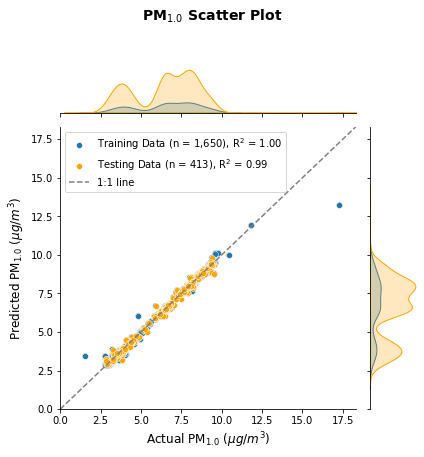

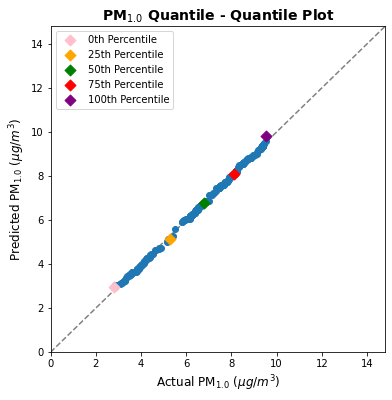

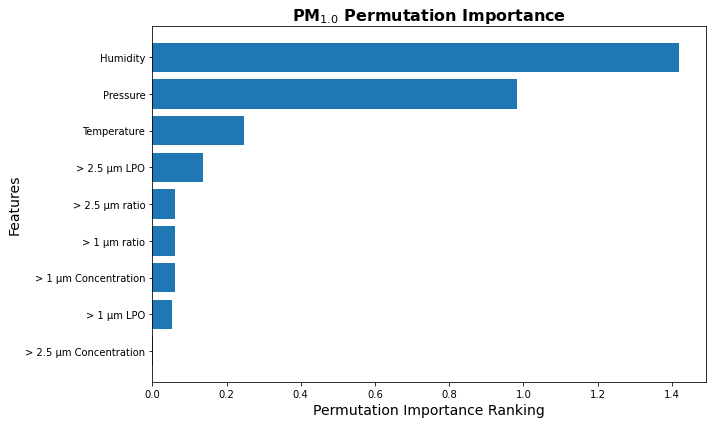

{'pm1': 0.99}

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

r2_score_test_sl = {}

def Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data):
    ml_type = 'SL'
    estimators = [
        ('lr', LinearRegression()),
        ('knn', KNeighborsRegressor()),
        ('xgb', XGBRegressor(random_state=42)),
        ('nn', MLPRegressor(random_state=42, max_iter=1000))  # Neural network
    ]

    model = StackingRegressor(
        estimators=estimators,
        final_estimator=RandomForestRegressor(random_state=42)  # Meta learner
    )

    model.fit(X_train, y_train)

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)

    # Concatenate the DataFrames
    combined_df = pd.concat([train_df, test_df])
    combined_df = combined_df.sort_index()

    r2_score_train = round(metrics.r2_score(y_train, predict_train), 2)
    r2_score_test = round(metrics.r2_score(y_test, predict_test), 2)
    print('r2 train', r2_score_train)
    print('r2 test', r2_score_test)

    if (v == 'dCn'):
        unit = 'dCn'
    else:
        unit = 'pm_conc'

    Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit, ml_type)
    qq_plot(test_df, v, unit, ml_type)
    Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression)

    return r2_score_test, model

for k, v in enumerate(Palas):
    if v == "pm1":
        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        X_train.to_csv("X_train.csv")
        X_test.to_csv("X_test.csv")
        y_train.to_csv("y_train.csv")
        y_test.to_csv("y_test.csv")
        r2_score_test_sl[v], model = Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data)

r2_score_test_sl


r2 train 1.0
r2 test 0.99


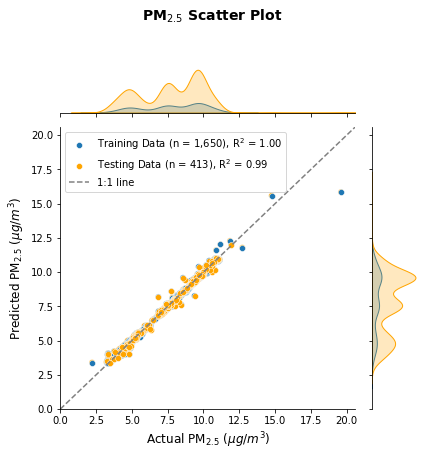

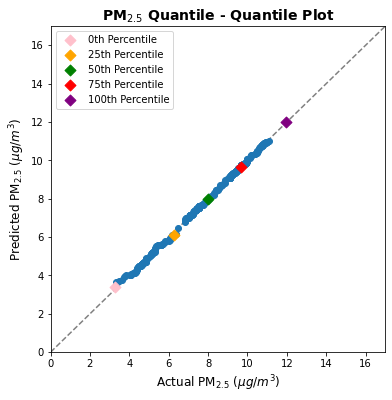

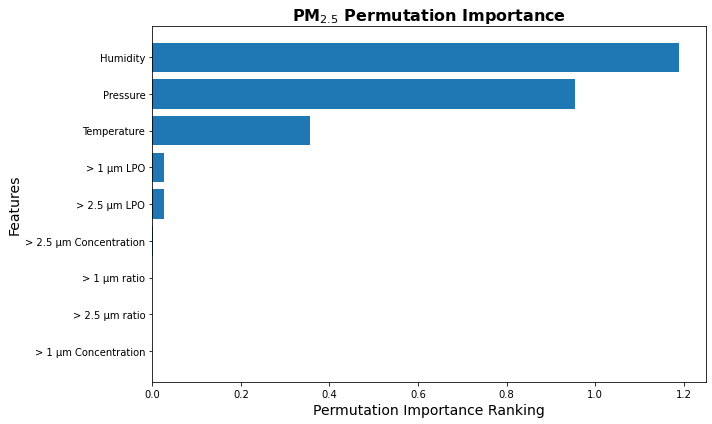

{'pm2_5': 0.99}

In [30]:
r2_score_test_sl = {}

def Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data):
    ml_type = 'SL'
    estimators = [
        ('knn', KNeighborsRegressor()),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('br', BaggingRegressor(random_state=42)),
        ('nn', MLPRegressor(random_state=42, max_iter=1000))  # Neural network
    ]
    
    model = StackingRegressor(
        estimators=estimators,
        final_estimator=RandomForestRegressor(random_state=42)  # Meta learner
    )

    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    
    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
    # Concatenate the DataFrames
    combined_df = pd.concat([train_df, test_df])
    combined_df = combined_df.sort_index()
    
    r2_score_train = round(metrics.r2_score(y_train, predict_train), 2)
    r2_score_test = round(metrics.r2_score(y_test, predict_test), 2)
    print('r2 train', r2_score_train)    
    print('r2 test', r2_score_test) 
    
    if (v == 'dCn'):
        unit = 'dCn'
    else:
        unit = 'pm_conc'
    
    Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit, ml_type)
    qq_plot(test_df, v, unit, ml_type)
    Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression)

    return r2_score_test, model

for k, v in enumerate(Palas):
    if v == "pm2_5":
        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        X_train.to_csv("X_train.csv")
        X_test.to_csv("X_test.csv")
        y_train.to_csv("y_train.csv")
        y_test.to_csv("y_test.csv")
        r2_score_test_sl[v], model = Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data)

r2_score_test_sl


r2 train 1.0
r2 test 0.99


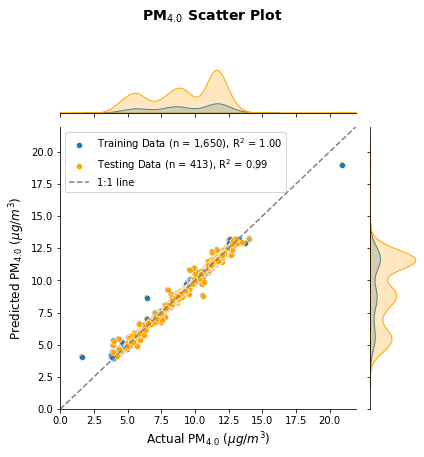

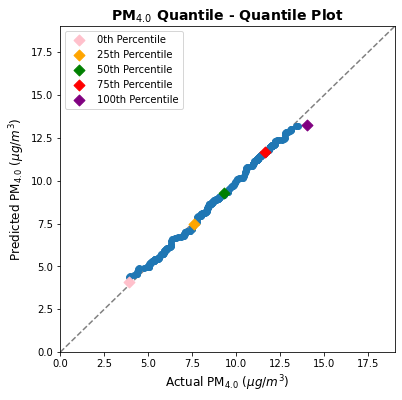

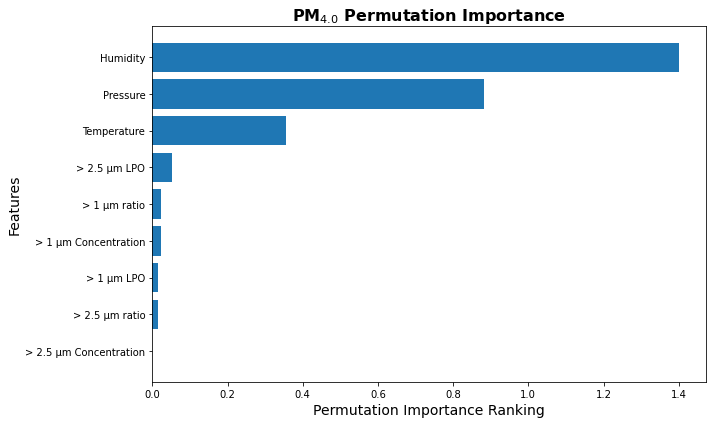

{'pm4': 0.99}

In [31]:
r2_score_test_sl = {}

def Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data):
    ml_type = 'SL'
    estimators = [
        ('lr', LinearRegression()),
        ('knn', KNeighborsRegressor()),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('xgb', XGBRegressor(random_state=42))
    ]
    
    model = StackingRegressor(
        estimators=estimators,
        final_estimator=RandomForestRegressor(random_state=42)
    )

    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    
    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
    # Concatenate the DataFrames
    combined_df = pd.concat([train_df, test_df])
    combined_df = combined_df.sort_index()
    
    r2_score_train = round(metrics.r2_score(y_train, predict_train), 2)
    r2_score_test = round(metrics.r2_score(y_test, predict_test), 2)
    print('r2 train', r2_score_train)    
    print('r2 test', r2_score_test) 
    
    if (v == 'dCn'):
        unit = 'dCn'
    else:
        unit = 'pm_conc'
    
    Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit, ml_type)
    qq_plot(test_df, v, unit, ml_type)
    Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression)

    return r2_score_test, model

for k, v in enumerate(Palas):
    if v == "pm4":
        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
        X_train.to_csv("X_train.csv")
        X_test.to_csv("X_test.csv")
        y_train.to_csv("y_train.csv")
        y_test.to_csv("y_test.csv")
        r2_score_test_sl[v], model = Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data)

r2_score_test_sl


r2 train 0.98
r2 test 0.91


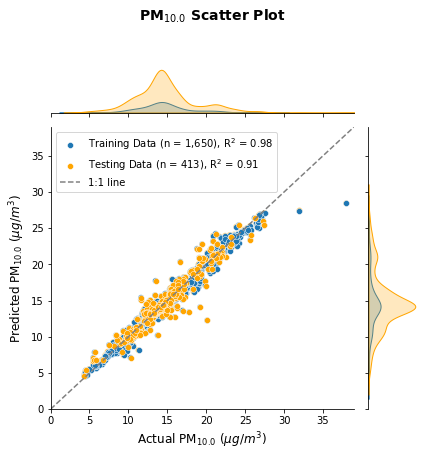

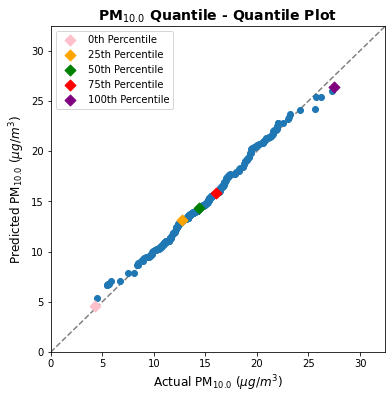

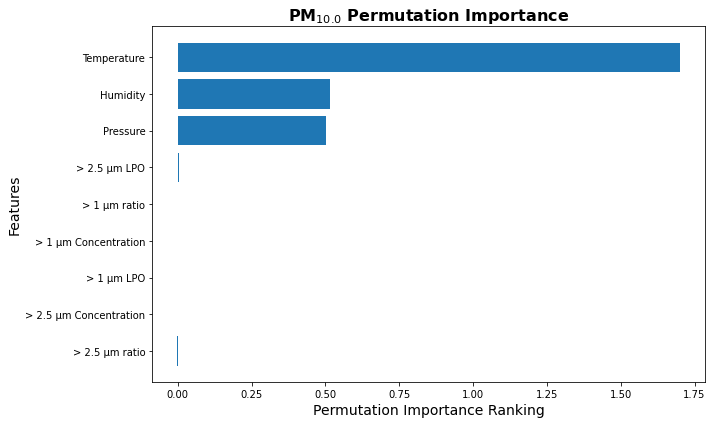

{'pm10': 0.91}

In [32]:
r2_score_test_sl = {}

def Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data):
    ml_type = 'SL'

    # Base learners
    estimators = [
        ('knn', KNeighborsRegressor()),
        ('rf', RandomForestRegressor(random_state=42)),
        ('xgb', XGBRegressor(random_state=42)),
        ('lgbm', LGBMRegressor(random_state=42))
    ]

    # Meta learner
    model = StackingRegressor(
        estimators=estimators,
        final_estimator=MLPRegressor(random_state=42, max_iter=1000)
    )

    model.fit(X_train, y_train)

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)

    # Concatenate the DataFrames
    combined_df = pd.concat([train_df, test_df])
    combined_df = combined_df.sort_index()

    r2_score_train = round(metrics.r2_score(y_train, predict_train), 2)
    r2_score_test = round(metrics.r2_score(y_test, predict_test), 2)
    print('r2 train', r2_score_train)
    print('r2 test', r2_score_test)

    if v == 'dCn':
        unit = 'dCn'
    else:
        unit = 'pm_conc'

    Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit, ml_type)
    qq_plot(test_df, v, unit, ml_type)
    Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression)

    return r2_score_test, model

for k, v in enumerate(Palas):
    if v == "pm10":
        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
        X_train.to_csv("X_train.csv")
        X_test.to_csv("X_test.csv")
        y_train.to_csv("y_train.csv")
        y_test.to_csv("y_test.csv")
        r2_score_test_sl[v], model = Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data)

r2_score_test_sl


r2 train 0.97
r2 test 0.86


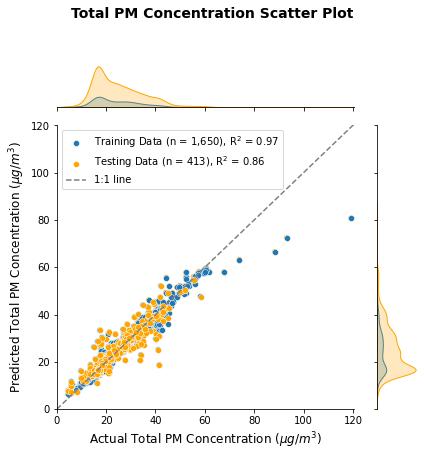

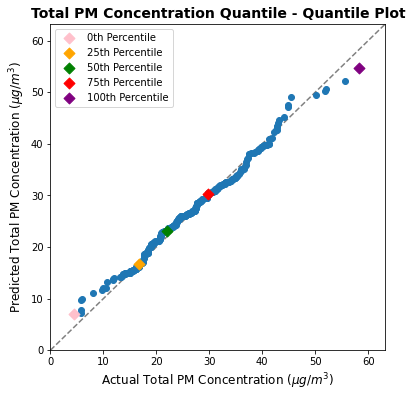

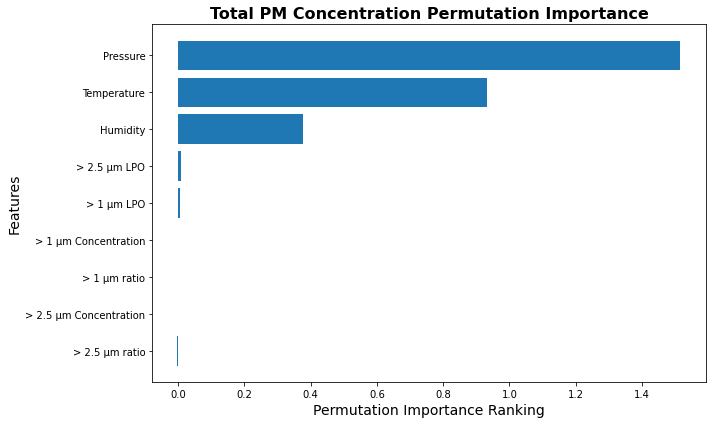

{'pmTotal': 0.86}

In [33]:
r2_score_test_sl = {}

def Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data):
    ml_type = 'SL'
    estimators = [
        ('knn', KNeighborsRegressor()),
        ('rf', RandomForestRegressor(random_state=42)),
        ('xgb', XGBRegressor(random_state=42)),
        ('lgbm', LGBMRegressor(random_state=42))
    ]
    
    model = StackingRegressor(
        estimators=estimators,
        final_estimator=MLPRegressor(random_state=42, max_iter=1000))

    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    
    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
    # Concatenate the DataFrames
    combined_df = pd.concat([train_df, test_df])
    combined_df = combined_df.sort_index()

    r2_score_train = round(metrics.r2_score(y_train, predict_train), 2)
    r2_score_test = round(metrics.r2_score(y_test, predict_test), 2)
    print('r2 train', r2_score_train)    
    print('r2 test', r2_score_test) 
    
    if (v == 'dCn'):
        unit = 'dCn'
    else:
        unit = 'pm_conc'
    
    Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit, ml_type)
    qq_plot(test_df, v, unit, ml_type)
    Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression)

    return r2_score_test, model

for k, v in enumerate(Palas):
    if v == "pmTotal":
        X = Palas[v].drop([v + "Palas"], axis=1)
        y = Palas[v][v + "Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        X_train.to_csv("X_train.csv")
        X_test.to_csv("X_test.csv")
        y_train.to_csv("y_train.csv")
        y_test.to_csv("y_test.csv")
        r2_score_test_sl[v], model = Stacking_Regression(X_train, X_test, y_train, y_test, filtered_data)

r2_score_test_sl


r2 train 1.0
r2 test 0.99


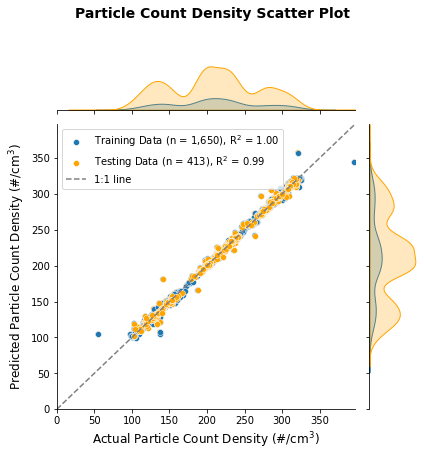

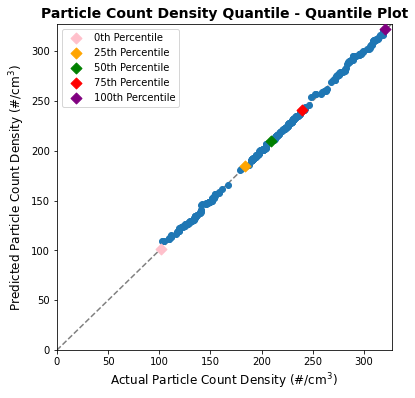

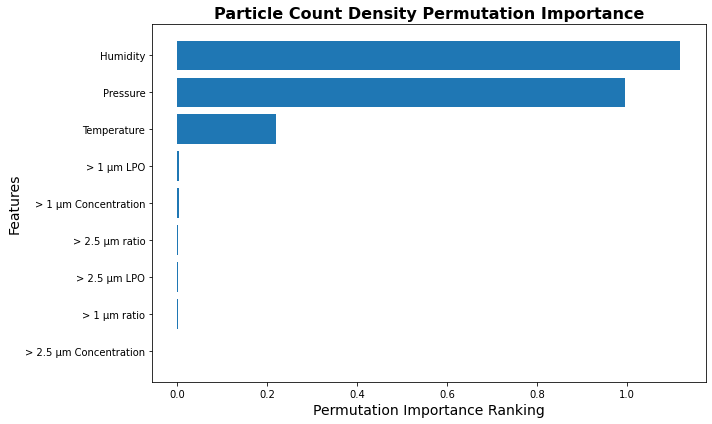

{'dCn': 0.99}

In [34]:
r2_score_test_sl = {}

def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
    ml_type = 'SL'
    estimators = [
        ('lr', LinearRegression()),
        ('rr', Ridge(random_state=42)),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('lgbm', LGBMRegressor(random_state=42))
    ]
    
    model = StackingRegressor(
        estimators = estimators,
        final_estimator =  RandomForestRegressor(random_state=42))

    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    
    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
    # Concatenate the DataFrames
    combined_df = pd.concat([train_df, test_df])
    combined_df = combined_df.sort_index()
    # Print or use the combined DataFrame as needed
    # print(combined_df)
    
    r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
    r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
    print('r2 train',r2_score_train)    
    print('r2 test',r2_score_test) 
    
    if (v == 'dCn'):
        unit = 'dCn'
    else:
        unit = 'pm_conc'
    
    Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
    qq_plot(test_df, v, unit,ml_type)
    Permutation_Importance_Stack_Regressor(model, X_test, y_test, v, unit, ml_type, dict_col_regression)

    return r2_score_test,model

for k,v in enumerate(Palas):
    if v=="dCn":
        X = Palas[v].drop([v+"Palas"],axis = 1)
        y = Palas[v][v+"Palas"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
        X_train.to_csv("X_train.csv")
        X_test.to_csv("X_test.csv")
        y_train.to_csv("y_train.csv")
        y_test.to_csv("y_test.csv")
        r2_score_test_sl[v],model = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
r2_score_test_sl

In [23]:
# R^2 values for train and test from the table
r2_train = [1.00, 1.00, 1.00, 0.98, 0.97, 1.00]
r2_test = [0.99, 0.99, 0.99, 0.91, 0.86, 0.99]

# Calculate overall R^2 for train and test
overall_r2_train = sum(r2_train) / len(r2_train)
overall_r2_test = sum(r2_test) / len(r2_test)

# Print the results
print(f"Overall R^2 (Train): {overall_r2_train:.2f}")
print(f"Overall R^2 (Test): {overall_r2_test:.2f}")


Overall R^2 (Train): 0.99
Overall R^2 (Test): 0.96


In [109]:
# # Suppress all warnings
# import warnings
# warnings.filterwarnings("ignore")
# import itertools
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import r2_score
# import pandas as pd

# # Define all learners
# learners = {
#     'lr': LinearRegression(),
#     'rr': Ridge(random_state=42),
#     'knn': KNeighborsRegressor(),
#     'dt': DecisionTreeRegressor(random_state=42),
#     'rf': RandomForestRegressor(random_state=42),
#     'br': BaggingRegressor(random_state=42),
#     'xgb': XGBRegressor(random_state=42),
#     'lgbm': LGBMRegressor(random_state=42),
#     'nn': MLPRegressor(random_state=42,max_iter = 1000)  # Default Neural Network with random_state
# }

# # Function to evaluate a stacking model
# def evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test):
#     estimators = [(name, model) for name, model in base_learners.items()]
#     model = StackingRegressor(estimators=estimators, final_estimator=meta_learner)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return r2_score(y_test, y_pred)

# # Prepare data for modeling
# results = []

# for v in Palas.keys():
#     print(v)
#     if v == "pm10":
#         X = Palas[v].drop([v + "Palas"], axis=1)
#         y = Palas[v][v + "Palas"]
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        
#          # Generate all combinations of 4 base learners
#         base_combinations = list(itertools.combinations(learners.keys(), 4))
#         counter = 0
#         for base_comb in base_combinations:
#             counter+=1
#             print("comb:",counter)
#             for meta_learner_name in learners.keys():
#                 base_learners = {name: learners[name] for name in base_comb}
#                 meta_learner = learners[meta_learner_name]
                
#                  # Evaluate the stacking model
#                 r2 = evaluate_stacking(base_learners, meta_learner, X_train, X_test, y_train, y_test)
                
#                  # Store the result
#                 results.append({
#                     'Base Learners': ', '.join(base_comb),
#                      'Meta Learner': meta_learner_name,
#                     'R2 Score': r2
#                  })
        
#         # Convert results to a DataFrame and sort by R2 score
#         results_df = pd.DataFrame(results)
#         results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
        
#         # Display the top-performing combinations
#         # import ace_tools as tools; tools.display_dataframe_to_user(name="Stacking Model Performance", dataframe=results_df)
        
#         # results_df


In [110]:
# r2_score_test_sl = {}

# def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
#     ml_type = 'SL'
#     estimators = [
#         ('rf', RandomForestRegressor(random_state = 42)),
#         ('dt', DecisionTreeRegressor(random_state=42)),
#         ('br',BaggingRegressor(random_state=42)),
#         ('lgbm', LGBMRegressor(random_state=42)
# )
#     ]
    
#     model = StackingRegressor(
#         estimators = estimators,
#         final_estimator = Ridge(random_state=42))

#     model.fit(X_train, y_train)
    
#     predict_train = model.predict(X_train)
#     predict_test = model.predict(X_test)
    
#     train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
#     test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
#     # Concatenate the DataFrames
#     combined_df = pd.concat([train_df, test_df])
#     combined_df = combined_df.sort_index()
#     # Print or use the combined DataFrame as needed
#     # print(combined_df)
    
#     r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
#     r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
#     print('r2 train',r2_score_train)    
#     print('r2 test',r2_score_test) 
    
#     if (v == 'dCn'):
#         unit = 'dCn'
#     else:
#         unit = 'pm_conc'
    
#     # Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
#     # qq_plot(test_df, v, unit,ml_type)
#     # Feature_Importance_Random_Forest_Regressor(model, filtered_data, v, unit,ml_type)
#     return r2_score_test,model

# for k,v in enumerate(Palas):
#     print(k)
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#     X_train.to_csv("X_train.csv")
#     X_test.to_csv("X_test.csv")
#     y_train.to_csv("y_train.csv")
#     y_test.to_csv("y_test.csv")
#     r2_score_test_sl[v],model = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
# r2_score_test_sl

In [113]:
# r2_score_test_sl = {}

# def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
#     ml_type = 'SL'
#     estimators = [
#         ('rf', RandomForestRegressor(random_state = 42)),
#         ('knn', KNeighborsRegressor()),
#         ('lr',LinearRegression()),
#         ('nn',     MLPRegressor(random_state=42,max_iter = 1000)
# )
#     ]
    
#     model = StackingRegressor(
#         estimators = estimators,
#         final_estimator = Ridge(random_state=42))

#     model.fit(X_train, y_train)
    
#     predict_train = model.predict(X_train)
#     predict_test = model.predict(X_test)
    
#     train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
#     test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
#     # Concatenate the DataFrames
#     combined_df = pd.concat([train_df, test_df])
#     combined_df = combined_df.sort_index()
#     # Print or use the combined DataFrame as needed
#     # print(combined_df)
    
#     r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
#     r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
#     print('r2 train',r2_score_train)    
#     print('r2 test',r2_score_test) 
    
#     if (v == 'dCn'):
#         unit = 'dCn'
#     else:
#         unit = 'pm_conc'
    
#     # Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
#     # qq_plot(test_df, v, unit,ml_type)
#     # Feature_Importance_Random_Forest_Regressor(model, filtered_data, v, unit,ml_type)
#     return r2_score_test,model

# for k,v in enumerate(Palas):
#     print(k)
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#     X_train.to_csv("X_train.csv")
#     X_test.to_csv("X_test.csv")
#     y_train.to_csv("y_train.csv")
#     y_test.to_csv("y_test.csv")
#     r2_score_test_sl[v],model = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
# r2_score_test_sl

In [112]:
# r2_score_test_sl = {}

# def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
#     ml_type = 'SL'
#     estimators = [
#         ('rf', RandomForestRegressor(random_state = 42)),
#         ('knn', KNeighborsRegressor()),
#         ('lgbm',LGBMRegressor()),
#         ('nn',     MLPRegressor(random_state=42,max_iter = 1000)
# )
#     ]
    
#     model = StackingRegressor(
#         estimators = estimators,
#         final_estimator = Ridge(random_state=42))

#     model.fit(X_train, y_train)
    
#     predict_train = model.predict(X_train)
#     predict_test = model.predict(X_test)
    
#     train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
#     test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
#     # Concatenate the DataFrames
#     combined_df = pd.concat([train_df, test_df])
#     combined_df = combined_df.sort_index()
#     # Print or use the combined DataFrame as needed
#     # print(combined_df)
    
#     r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
#     r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
#     print('r2 train',r2_score_train)    
#     print('r2 test',r2_score_test) 
    
#     if (v == 'dCn'):
#         unit = 'dCn'
#     else:
#         unit = 'pm_conc'
    
#     # Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
#     # qq_plot(test_df, v, unit,ml_type)
#     # Feature_Importance_Random_Forest_Regressor(model, filtered_data, v, unit,ml_type)
#     return r2_score_test,model

# for k,v in enumerate(Palas):
#     print(k)
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#     X_train.to_csv("X_train.csv")
#     X_test.to_csv("X_test.csv")
#     y_train.to_csv("y_train.csv")
#     y_test.to_csv("y_test.csv")
#     r2_score_test_sl[v],model = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
# r2_score_test_sl

In [ ]:
# r2_score_test_sl = {}

# def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
#     ml_type = 'SL'
#     estimators = [
#         ('rf', RandomForestRegressor(random_state = 42)),
#         ('br', BaggingRegressor(random_state=42)),
#         ('lgbm',LGBMRegressor(random_state=42)),
#         ('nn',     MLPRegressor(random_state=42)
# )
#     ]
    
#     model = StackingRegressor(
#         estimators = estimators,
#         final_estimator = Ridge(random_state=42))

#     model.fit(X_train, y_train)
    
#     predict_train = model.predict(X_train)
#     predict_test = model.predict(X_test)
    
#     train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
#     test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
#     # Concatenate the DataFrames
#     combined_df = pd.concat([train_df, test_df])
#     combined_df = combined_df.sort_index()
#     # Print or use the combined DataFrame as needed
#     # print(combined_df)
    
#     r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
#     r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
#     print('r2 train',r2_score_train)    
#     print('r2 test',r2_score_test) 
    
#     if (v == 'dCn'):
#         unit = 'dCn'
#     else:
#         unit = 'pm_conc'
    
#     Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
#     qq_plot(test_df, v, unit,ml_type)
#     # Feature_Importance_Random_Forest_Regressor(model, filtered_data, v, unit,ml_type)
#     return r2_score_test,model

# for k,v in enumerate(Palas):
#     print(k)
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#     X_train.to_csv("X_train.csv")
#     X_test.to_csv("X_test.csv")
#     y_train.to_csv("y_train.csv")
#     y_test.to_csv("y_test.csv")
#     r2_score_test_sl[v],model = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
# r2_score_test_sl

In [ ]:

# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/LGBM_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Ridge_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/KNN_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Neural_Network_Regression_Optimized.ipynb
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Random_Forest_Regression_Optimized.ipynb


In [175]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import StackingRegressor, RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score
# from lightgbm import LGBMRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler
# from bayes_opt import BayesianOptimization

# # Define Bayesian optimization function for each model
# def bayesian_optimization(model_func, param_space, X_train, y_train):
#     def objective_function(**params):
#         # Cast parameters to int where required
#         params = {k: int(v) if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'n_neighbors', 'num_leaves'] else v for k, v in params.items()}
#         if 'hidden_layer_sizes' in params:
#             params['hidden_layer_sizes'] = tuple([int(params['hidden_layer_sizes']) for _ in range(2)])
#         model = model_func(**params)
#         model.fit(X_train, y_train)
#         return model.score(X_train, y_train)

#     optimizer = BayesianOptimization(
#         f=objective_function,
#         pbounds=param_space,
#         random_state=42,
#         verbose=2,
#         allow_duplicate_points=True
#     )
#     optimizer.maximize(init_points=5, n_iter=50)

#     best_params = optimizer.max['params']
#     best_params = {k: int(v) if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'n_neighbors', 'num_leaves'] else v for k, v in best_params.items()}
#     if 'hidden_layer_sizes' in best_params:
#         best_params['hidden_layer_sizes'] = tuple([int(best_params['hidden_layer_sizes']) for _ in range(2)])
#     return model_func(**best_params)

# # Define parameter spaces for base learners and meta-learner
# param_spaces = {
#     'rf': {
#         'n_estimators': (50, 300),
#         'max_depth': (5, 50),
#         'min_samples_split': (2, 10),
#         'min_samples_leaf': (1, 4),
#     },
#     'knn': {
#         'n_neighbors': (3, 30),
#     },
#     'lgbm': {
#         'num_leaves': (20, 100),
#         'max_depth': (3, 15),
#         'learning_rate': (0.01, 0.3),
#         'n_estimators': (50, 200),
#     },
#     'nn': {
#         'hidden_layer_sizes': (64, 128),
#         'learning_rate_init': (0.0001, 0.01),
#     },
#     'ridge': {
#         'alpha': (0.1, 10.0),
#     }
# }

# # Stacking Regressor with Bayesian Optimization
# def Stacking_Regression(X_train, X_test, y_train, y_test):
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Tune base learners
#     rf = bayesian_optimization(RandomForestRegressor, param_spaces['rf'], X_train, y_train)
#     knn = bayesian_optimization(KNeighborsRegressor, param_spaces['knn'], X_train, y_train)
#     lgbm = bayesian_optimization(LGBMRegressor, param_spaces['lgbm'], X_train, y_train)
#     nn = bayesian_optimization(lambda **kwargs: MLPRegressor(random_state=42, max_iter=1000, **kwargs), param_spaces['nn'], X_train_scaled, y_train)

#     # Tune meta-learner
#     ridge = bayesian_optimization(Ridge, param_spaces['ridge'], X_train, y_train)

#     # Define stacking model
#     estimators = [
#         ('rf', rf),
#         ('knn', knn),
#         ('lgbm', lgbm),
#         ('nn', nn),
#     ]
#     model = StackingRegressor(estimators=estimators, final_estimator=ridge)

#     # Fit and predict
#     model.fit(X_train_scaled, y_train)
#     predict_train = model.predict(X_train_scaled)
#     predict_test = model.predict(X_test_scaled)

#     r2_score_train = round(r2_score(y_train, predict_train), 2)
#     r2_score_test = round(r2_score(y_test, predict_test), 2)
#     print('R2 Train:', r2_score_train)
#     print('R2 Test:', r2_score_test)

#     return r2_score_test, model

# # Iterate over Palas keys
# r2_score_test_sl = {}
# for k in Palas.keys():
#     if k == "pmTotal":
#         print(k)
#         X = Palas[k].drop([k + "Palas"], axis=1)
#         y = Palas[k][k + "Palas"]
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#         r2_score_test_sl[k], model = Stacking_Regression(X_train, X_test, y_train, y_test)

# # Results
# print(r2_score_test_sl)


In [45]:
# r2_score_test_sl = {}

# def Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data):
#     ml_type = 'SL'
#     estimators = [
#         ('rf', RandomForestRegressor(n_estimators = 50, random_state = 0)),
#         ('br', BaggingRegressor(estimator = RandomForestRegressor(), n_estimators=10, random_state=42)),
#         ('lgbm',LGBMRegressor(
#         n_estimators=100,
#         max_depth=-1,
#         learning_rate=0.1,
#         num_leaves=31,
#         min_child_samples=20,
#         random_state=1
#         )),
#         ('nn',     MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', random_state=1, max_iter=500)
# )
#     ]
    
#     model = StackingRegressor(
#         estimators = estimators,
#         final_estimator = Ridge(alpha=1.0, random_state=42))

#     model.fit(X_train, y_train)
    
#     predict_train = model.predict(X_train)
#     predict_test = model.predict(X_test)
    
#     train_df = pd.DataFrame({'Actual': y_train, 'Predicted': predict_train, 'Category': 'Training'}, index=y_train.index)
#     test_df = pd.DataFrame({'Actual': y_test, 'Predicted': predict_test, 'Category': 'Testing'}, index=y_test.index)
    
#     # Concatenate the DataFrames
#     combined_df = pd.concat([train_df, test_df])
#     combined_df = combined_df.sort_index()
#     # Print or use the combined DataFrame as needed
#     # print(combined_df)
    
#     r2_score_train = round(metrics.r2_score(y_train, predict_train),2) 
#     r2_score_test = round(metrics.r2_score(y_test, predict_test),2)
#     print('r2 train',r2_score_train)    
#     print('r2 test',r2_score_test) 
    
#     if (v == 'dCn'):
#         unit = 'dCn'
#     else:
#         unit = 'pm_conc'
    
#     Scatter_Plot(combined_df, train_df, test_df, r2_score_train, r2_score_test, v, unit,ml_type)
#     qq_plot(test_df, v, unit,ml_type)
#     # Feature_Importance_Random_Forest_Regressor(model, filtered_data, v, unit,ml_type)
#     return r2_score_test,model

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,ra)
#     X_train.to_csv("X_train.csv")
#     X_test.to_csv("X_test.csv")
#     y_train.to_csv("y_train.csv")
#     y_test.to_csv("y_test.csv")
#     r2_score_test_sl[v],model = Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data)
# r2_score_test_sl

In [111]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import StackingRegressor, RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score
# from lightgbm import LGBMRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler
# from bayes_opt import BayesianOptimization

# # Define Bayesian optimization function for each model
# def bayesian_optimization(model_func, param_space, X_train, y_train):
#     def objective_function(**params):
#         # Cast parameters to int where required
#         params = {k: int(v) if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'n_neighbors', 'num_leaves'] else v for k, v in params.items()}
#         if 'hidden_layer_sizes' in params:
#             params['hidden_layer_sizes'] = tuple([int(params['hidden_layer_sizes']) for _ in range(2)])
#         model = model_func(**params)
#         model.fit(X_train, y_train)
#         return model.score(X_train, y_train)

#     optimizer = BayesianOptimization(
#         f=objective_function,
#         pbounds=param_space,
#         random_state=42,
#         verbose=2,
#         allow_duplicate_points=True
#     )
#     optimizer.maximize(init_points=5, n_iter=50)

#     best_params = optimizer.max['params']
#     best_params = {k: int(v) if k in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'n_neighbors', 'num_leaves'] else v for k, v in best_params.items()}
#     if 'hidden_layer_sizes' in best_params:
#         best_params['hidden_layer_sizes'] = tuple([int(best_params['hidden_layer_sizes']) for _ in range(2)])
#     return model_func(**best_params)

# # Define parameter spaces for base learners and meta-learner
# param_spaces = {
#     'rf': {
#         'n_estimators': (50, 300),
#         'max_depth': (5, 50),
#         'min_samples_split': (2, 10),
#         'min_samples_leaf': (1, 4),
#     },
#     'dt': {
#         'max_depth': (5, 50),
#         'min_samples_split': (2, 10),
#         'min_samples_leaf': (1, 4),
#     },
#     'lgbm': {
#         'num_leaves': (20, 100),
#         'max_depth': (3, 15),
#         'learning_rate': (0.01, 0.3),
#         'n_estimators': (50, 200),
#     },
#     'nn': {
#         'hidden_layer_sizes': (64, 128),
#         'learning_rate_init': (0.0001, 0.01),
#     },
#     'ridge': {
#         'alpha': (0.1, 10.0),
#     }
# }

# # Stacking Regressor with Bayesian Optimization
# def Stacking_Regression(X_train, X_test, y_train, y_test):
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Tune base learners
#     rf = bayesian_optimization(RandomForestRegressor, param_spaces['rf'], X_train, y_train)
#     dt = bayesian_optimization(DecisionTreeRegressor, param_spaces['dt'], X_train, y_train)
#     lgbm = bayesian_optimization(LGBMRegressor, param_spaces['lgbm'], X_train, y_train)
#     nn = bayesian_optimization(lambda **kwargs: MLPRegressor(random_state=42, max_iter=1000, **kwargs), param_spaces['nn'], X_train_scaled, y_train)

#     # Tune meta-learner
#     ridge = bayesian_optimization(Ridge, param_spaces['ridge'], X_train, y_train)

#     # Define stacking model
#     estimators = [
#         ('rf', rf),
#         ('dt', dt),
#         ('lgbm', lgbm),
#         ('nn', nn),
#     ]
#     model = StackingRegressor(estimators=estimators, final_estimator=ridge)

#     # Fit and predict
#     model.fit(X_train_scaled, y_train)
#     predict_train = model.predict(X_train_scaled)
#     predict_test = model.predict(X_test_scaled)

#     r2_score_train = round(r2_score(y_train, predict_train), 2)
#     r2_score_test = round(r2_score(y_test, predict_test), 2)
#     print('R2 Train:', r2_score_train)
#     print('R2 Test:', r2_score_test)

#     return r2_score_test, model

# # Iterate over Palas keys
# r2_score_test_sl = {}
# for k in Palas.keys():
#     if k == "pmTotal":
#         print(k)
#         X = Palas[k].drop([k + "Palas"], axis=1)
#         y = Palas[k][k + "Palas"]
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#         r2_score_test_sl[k], model = Stacking_Regression(X_train, X_test, y_train, y_test)

# # Results
# print(r2_score_test_sl)


In [ ]:
# r2_score_test_stacking_optim = {}
# print("========================= Stacking  Regressor  = Ridge  Regressor ================================")
# %run D:/UTD/UTDFall2023/Calibration-of-LoRaNodes-using-Super-Learners/models/Stacking_Regression_Ridge_Regression.ipynb

# for k,v in enumerate(Palas):
#     X = Palas[v].drop([v+"Palas"],axis = 1)
#     y = Palas[v][v+"Palas"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state= 40)
#     # print("x train",X_train.shape)
#     # print("x test",X_test.shape)
#     # print("y train",y_train.shape)
#     # print("y test",y_test.shape)
    
#     r2_score_test  =  Stacking_Regression(X_train,X_test,y_train,y_test,filtered_data,hyperparameter_dict_before_filtering[v])
#     r2_score_test_stacking_optim[v] = r2_score_test
# r2_score_test_stacking_optim